# INFO 6205 – Program Structure and Algorithms Worked Assignment 2

Student Name:**Xiaoyang Chen**               
Professor: **Nik Bear Brown**

## Q1(10 Points)
Use the Kruskal algorithm to find a minimum spanning tree for the following connected weighted graph:

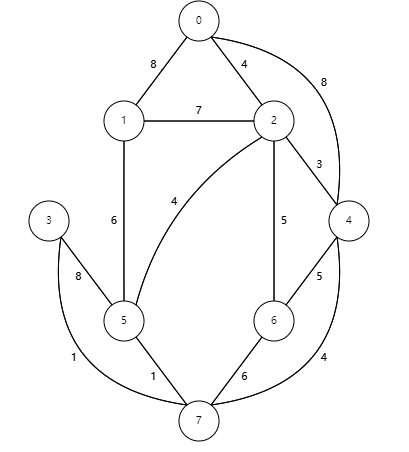

// Kruskal's Algorithm
1. Sort all the edges in non-decreasing order of their weights.
2. Initialize an empty minimum spanning tree MST.
3. Iterate through the sorted edges:
   a. If adding the current edge to MST does not form a cycle, add it to MST.
   b. Otherwise, skip the edge.
4. Repeat step 3 until MST has V-1 edges, where V is the number of vertices in the graph.
5. MST is the minimum spanning tree.

Solution:
1. Sort all the edges in increasing order of their weight:

(5, 7) - 1

(3, 7) - 1

(2, 4) - 3

(2, 5) - 4

(0, 4) - 4

(4, 7) - 4

(4, 6) - 5

(2, 6) - 5

(1, 5) - 6

(6, 7) - 6

(1, 2) - 7

(0, 1) - 8

(0, 4) - 8
                                            
                           
2. Pick the smallest edge in order           
                                
3. At this point, we've connected all vertices and have our minimum spanning tree:             
                   
Edges in the MST:

(3, 7) - 1

(5, 7) - 1

(2, 4) - 3

(2, 5) - 4

(0, 2) - 4

(2, 6) - 5

(1, 5) - 6

The total weight for this MST is 1 + 1 + 3 + 4 + 4 + 5 + 6 = 24.             
Kruskal's algorithm is O(E log V) time. Where E is the set of edges and V is the set of vertices.

## Q2(10 Points)

Given the DAG below,which consists of vertices {A, B, C, D, E, F} and the following edges:        
{(A, B), (A, C), (B, D), (B, E), (C, F), (D, G), (E, G), (F, G)}      
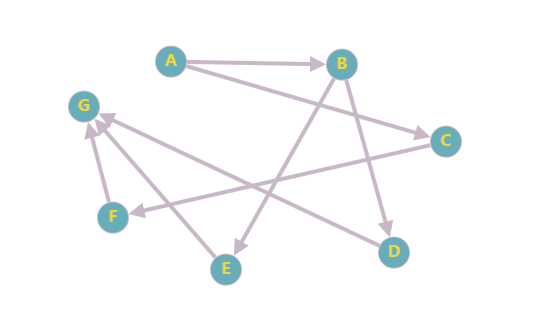

Answer the following:

Express the directed graph as:
An adjacency list
An adjacency matrix
Can the directed graph be topologically sorted? If so, produce a topological sort for the graph.

## Answer:              
A. Express the graph as::          
i. Adjacency List   

A: [B, C]        
B: [D, E]       
C: [F]       
D: [G]        
E: [G]     
F: [G]      
G: []         


ii. Adjacency Matrix        

|---| A | B | C | D | E | F | G |                   
| A | 0 | 1 | 1 | 0 | 0 | 0 | 0 |        
| B | 0 | 0 | 0 | 1 | 1 | 0 | 0 |        
| C | 0 | 0 | 0 | 0 | 0 | 1 | 0 |         
| D | 0 | 0 | 0 | 0 | 0 | 0 | 1 |          
| E | 0 | 0 | 0 | 0 | 0 | 0 | 1 |          
| F | 0 | 0 | 0 | 0 | 0 | 0 | 1 |        
| G | 0 | 0 | 0 | 0 | 0 | 0 | 0 |            
         

B. Topological Sort:
Yes, it can be topologically sorted.

We can achieve topological sorting using Kahn algorithm.

In [4]:
from collections import defaultdict, deque

def topological_sort(graph):
    in_degree = {node: 0 for node in graph}  
    
    for node in graph:
        for neighbor in graph[node]:
            in_degree[neighbor] += 1

  
    queue = deque([node for node in in_degree if in_degree[node] == 0])

    sorted_order = []  

    while queue:
        current_node = queue.popleft()
        sorted_order.append(current_node)

        for neighbor in graph[current_node]:
            in_degree[neighbor] -= 1  

            if in_degree[neighbor] == 0:
                queue.append(neighbor)

    if len(sorted_order) == len(graph):
        return sorted_order
    else:
        return "The graph contains a cycle"

if __name__ == "__main__":
    graph = {
        'A': ['B', 'C'],
        'B': ['D', 'E'],
        'C': ['F'],
        'D': ['G'],
        'E': ['G'],
        'F': ['G'],
        'G': []
    }
    print(topological_sort(graph))


['A', 'B', 'C', 'D', 'E', 'F', 'G']


The Python code for topological sorting uses Kahn's algorithm and proceeds through the following steps:

Initialize In-degree Counts: The in_degree dictionary is initialized to keep track of the number of incoming edges for each vertex. Initially, this is set to 0 for all vertices.

Calculate In-degree: The code iterates through all edges in the graph to update the in-degree count for each vertex.

Queue Initialization: A queue is initialized to keep track of vertices with an in-degree of 0. These vertices have no dependencies and can be processed immediately.

Topological Sort: The algorithm repeatedly removes a vertex from the front of the queue, adds it to the sorted order, and then looks at its neighbors.For each neighbor, the in-degree is decreased by 1, as one of its dependencies has been resolved.
If this causes the in-degree to become 0, the neighbor is added to the queue, as it no longer has any dependencies that need to be processed before it.         

Check for Cycles: Finally, the algorithm checks whether the number of vertices in the sorted list matches the number of vertices in the graph. If they don't match, that implies the graph contains at least one cycle, and a topological sort is not possible.

Output: If there is no cycle, the function returns a list representing the topological order. Otherwise, it returns a string indicating that the graph contains a cycle.


## Q3 (10 Points)   
For each of the following recurrences, give an expression for the runtime T(n) if the recurrence can be solved with the Master Theorem. Otherwise, indicate that the Master Theorem does not apply

i.  T(n)=4T(n/2)+n^2 logn           
ii. T(n)=T(n/4)+n^0.75          
iii.T(n)=0.5T(n/3)+n^4 logn               
iv. T(n)=3T(n/3)+n^1.5         
v.  T(n)=n^2 T(n/4)+nlogn          

#### Solutions:         
Master Theorem Recap                    
The Master Theorem provides asymptotic bounds for recurrence relations of the form T(n)=aT(n/b)+f(n), wherea≥1 and b>1. Then T(n) can be classified as one of the following to determine the asymptotic bounds:

A.f(n) is polynomially smaller than T(n)        

B. f(n) and T(n) are of the same size       

C. f(n) is polynomially larger than T(n)        

D. The Master Theorem does not apply    

#### Sample Solutions:        

i. T(n)=4T(n/2)+n^2 logn           
A=4,B=2,logb(a)=log2(4)=2,f(n)=n^2logn       
f(n) is polynomially larger than T(n)      

Therefore, T(n)=Θ(f(n))=Θ(n^2logn)         

ii. T(n)=T(n/4)+n^0.75      
A=1,B=4,logb(a)=log4(1)=0         
f(n) is polynomially larger than T(n)    
Therefore, T(n)=Θ(f(n))=Θ(n^0.75)

iii.T(n)=0.5T(n/3)+n^4 logn       
Master Theorem does not apply;        
A is a function of n.        

iv. T(n)=3T(n/3)+n^1.5         
A=3,B=3,logb(a)=log3(3)=1,f(n)=n^1.5
f(n) is polynomially larger than T(n)

Therefore, T(n)=Θ(f(n))=Θ(n^1.5)

v. T(n)=n^2 T(n/4)+nlogn                    
Master Theorem does not apply;              
A is a function of n.        

## Q4 (10 Points)   

Suppose we have several coins of different denominations c1, c2, ..., cn (the denominations are all natural numbers), and a total amount S. We want to know the minimum number of coins needed to find the total amount S such that the minimum number of coins used is used.Use dynamic programming.

#### Answer:
Suppose we have coins with face values 1, 2, and 5 for a total amount S = 11.       

Initialize an array dp of length S+1 and set dp[0] = 0. The remaining values are initialized to infinity.         

dp = [0, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf]        
In the first round, the dp array is updated with a coin with a face value of 1.       

dp = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]         
In the second round, the dp array is updated with a coin with a face value of 2.           

dp = [0, 1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6]          
In the third round, the dp array is updated with a coin with a face value of 5.           

dp = [0, 1, 1, 2, 2, 1, 2, 2, 3, 3, 2, 3]           
The final result is dp[11] = 3, which means we need at least 3 coins to make the total amount S = 11. The face values of these three coins can be 5, 5, and 1.          

In [6]:
def coinChange(coins, S):
    dp = [float('inf')] * (S + 1)
    dp[0] = 0

    for coin in coins:
        for i in range(coin, S + 1):
            dp[i] = min(dp[i], dp[i - coin] + 1)

    return dp[S] if dp[S] != float('inf') else -1

# test
coins = [1, 2, 5]
S = 11
result = coinChange(coins, S)
print(f"The minimum number of coins needed is: {result}")


The minimum number of coins needed is: 3


## Q5 (10 Points)   

#### Grouped knapsack problem
Given n items and a knapsack with capacity w. The cost of the i-th item is ci and the value is wi. Items are divided into several groups. The items in each group conflict with each other. At most one can be selected. The problem is how to select items so that the total cost of the items does not exceed the capacity of the backpack while maximizing their value. Use dymanic programming.

In [7]:
def group_knapsack(n, groups, W):
    dp = [0] * (W + 1)
    for group in groups:
        for w in range(W, -1, -1):
            for item in group:
                cost, value = item
                if w >= cost:
                    dp[w] = max(dp[w], dp[w - cost] + value)
    return dp[W]

# sample
groups = [
    [(1, 4), (2, 5)],  # Group 1：(cost,weight) (1, 4) and (2, 5)
    [(1, 2)],          # Group 2：(cost,weight)  (1, 2)
    [(3, 9)]           # Group 3：(cost,weight)  (3, 9)
]
W = 4  # bag capacity
n = sum(len(group) for group in groups)  # n items

result = group_knapsack(n, groups, W)
print(f"The maximum value that can be obtained is: {result}")


The maximum value that can be obtained is: 13


The core idea of the algorithm is to use dynamic programming to solve problems. We maintain an array dp, where dp[i] stores the maximum value that can be obtained when the backpack capacity is i.

Initialization phase: First, we initialize the dp array so that all its elements are 0 (representing the value when no item is selected).

Iteration of groups: Then, iterate over each group of items.

a. Inner loop: For each item in the group, we also iterate to see if this item should be selected.

b. State transfer: Assume that the cost of the item currently under consideration is cost and the value is value. We update dp[w] (where w >= cost) to max(dp[w], dp[w - cost] + value), which means that if you select this item, you can get it from a smaller backpack Capacity w - cost is transferred to the current backpack capacity w.

Final result: In the end, dp[W] will contain the maximum value that can be obtained with a backpack capacity of W.

The time complexity of this algorithm is O(n×W), where n is the total number of items in all groups and W is the capacity of the backpack. This is because we need to loop through each group, then loop through each item within each group, and update the dp array.

## Q6 (30 Points)
Jin Ming’s budget plan       

Jin Ming is very happy today. He is about to receive the keys to the new house his family has purchased. There is a spacious room in the new house that Jin Ming can use exclusively for himself. What makes him even more happy is that his mother said to him yesterday: "You have the final say on what items you need to buy and how to decorate your room, as long as it does not exceed $n$ dollars." Early this morning, Jin Ming started making a budget. He divided the items he wanted to buy into two categories: main items and accessories. Accessories are subordinate to a certain main item. The following table is an example of some main items and accessories:

| Main parts | Accessories |
| :----------: | :----------: |
| Computer | Printer, scanner |
| Bookcase | Books |
| Desks | Table lamps, stationery |
| Task chairs | None |

If you want to buy an item classified as an accessory, you must first buy the main item to which the accessory belongs. Each main item can have $0$, $1$, or $2$ attachments. Each accessory corresponds to a main part, and the accessory no longer has its own accessory. Jin Ming wants to buy a lot of things, which will definitely exceed the $n$ yuan limited by his mother. So, he assigned an importance level to each item and divided it into $5$ and so on: represented by the integer $1 \sim 5$, the $5$ and so on are the most important. He also found the price of each item (all multiples of $10$) from the Internet. He hopes to maximize the sum of the product of the price and importance of each item without exceeding $n$ yuan.

Assume that the price of the $j$th item is $v_j$, the importance is $w_j$, and $k$ items are selected in total, and the numbers are $j_1,j_2,\dots,j_k$, then the required sum is :
$v_{j_1} \times w_{j_1}+v_{j_2} \times w_{j_2}+ \dots +v_{j_k} \times w_{j_k}$.

Please help Jin Ming design a shopping list that meets the requirements.

## Input format

The first line has two integers, representing the total amount of money $n$ and the number of items you want to buy $m$.

Lines $2$ to $(m + 1)$ have three integers in each line. The integers $v_i$, $p_i$, and $q_i$ in line $(i + 1)$ represent the $i$-th item respectively. The price, importance and its corresponding main parts. If $q_i=0$, it means that the item itself is the main item.

## Output format

Output a line with an integer representing the answer.


### Sample input #1

```
1000 5
800 2 0
400 5 1
300 5 1
400 3 0
500 2 0
```

### Sample Output #1

```
2200
```

#### Analyze:
This question is an advancement of the Q5----Dependent knapsack DP.

According to the topological structure of the question, it can be observed that the relationship between each item constitutes a forest.

In the past, the relationship between each item in backpack DP was arbitrary (but we generally regarded it as linear)

Therefore, if this question uses backpack DP, it needs to be changed from the original linear DP to tree DP.

In the dependent knapsack problem we use the sub-item volume for set division

The time complexity is O(N×V×V)
But for the data range of question V, if this kind of set partitioning scheme is used, there will undoubtedly be a timeout.

Note that it is mentioned in the title that each main item has no more than 2 accessories, and the attached items will not have any more accessories. Therefore, we can use group backpacks to group and divide the status of this question. The specific idea is that List all combinations of selected sub-items, each combination corresponds to an item in a grouped backpack

This time complexity is O(N×2^2×V)

In [10]:
# Initialize variables
N = 65
M = 32010

n, m = 0, 0
w = [0] * N  # weight array
v = [0] * N  # value array
f = [0] * M  # dp array to store maximum value for each capacity
not_aff = [False] * N  # array to mark each main item in a group
aff = [[] for _ in range(N)]  # array to store accessory items for each main item

# Function to perform dp for a given group
def dp(u, j):
    siz = len(aff[u])
    # Enumerate all combinations of accessory items in this group
    for st in range(1 << siz):
        v_sum, w_sum = v[u], w[u]  # Must buy main item first, then the accessory items have value
        for i in range(siz):
            if (st >> i) & 1:
                v_sum += v[aff[u][i]]
                w_sum += w[aff[u][i]]
        # Perform the state transition
        if v_sum <= j:
            f[j] = max(f[j], f[j - v_sum] + w_sum)

# Input
m, n = map(int, input().split())
for i in range(1, n + 1):
    v[i], w[i], fa = map(int, input().split())
    w[i] *= v[i]
    if fa:
        aff[fa].append(i)
    else:
        not_aff[i] = True  # Mark main items in each group

# Perform dp
for i in range(1, n + 1):
    if not_aff[i]:  # This is a main item in a group
        for j in range(m, -1, -1):
            dp(i, j)

# Output the result
print(f[m])


1000 5
800 2 0
400 5 1 
300 5 1
400 3 0
 500 2 0
2200
